<a href="https://colab.research.google.com/github/sayonaramagalhaes/Atividade-ML---terceira/blob/main/Exemplo_Otimizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install torch torchvision matplotlib


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR

# Definindo um modelo simples
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [17]:
# Definir o modelo
model = SimpleNN()

# Definir o critério de perda (Loss)
criterion = nn.CrossEntropyLoss()

# Optimizadores
optimizer_sgd = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
optimizer_adam = optim.Adam(model.parameters(), lr=0.001)

# Learning Rate Scheduler (reduz a taxa de aprendizado ao longo do tempo)
scheduler = StepLR(optimizer_adam, step_size=5, gamma=0.1)


In [18]:
# Função para aplicar EWMA nos parâmetros do modelo
def apply_ewma(model, beta=0.9):
    for param in model.parameters():
        if param.grad is not None:
            param.grad = beta * param.grad + (1 - beta) * param.grad


In [33]:
# Função para treinar o modelo
def train_model(optimizer, epochs=10, use_ewma=False):
    losses = []
    for epoch in range(epochs):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.view(-1, 784), labels


            optimizer.zero_grad()


            outputs = model(inputs)
            loss = criterion(outputs, labels)


            loss.backward()

            # Aplicar EWMA se necessário
            if use_ewma:
                apply_ewma(model)


            optimizer.step()


            running_loss += loss.item()


        scheduler.step()
        epoch_loss = running_loss / len(train_loader)
        losses.append(epoch_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss}")

    return losses

In [35]:
# Treinando com SGD e armazenando as perdas
sgd_losses = train_model(optimizer_sgd, epochs=10, use_ewma=True)

# Treinando com Adam e armazenando as perdas
adam_losses = train_model(optimizer_adam, epochs=10, use_ewma=False)

Epoch 1/10, Loss: 0.00013385385636690235
Epoch 2/10, Loss: 0.00012909813851746588
Epoch 3/10, Loss: 0.00012568365759970412
Epoch 4/10, Loss: 0.00012085898209994287
Epoch 5/10, Loss: 0.00011719247292195335
Epoch 6/10, Loss: 0.00011359368352447343
Epoch 7/10, Loss: 0.00011053446843722158
Epoch 8/10, Loss: 0.00010766841845426354
Epoch 9/10, Loss: 0.00010431141818731376
Epoch 10/10, Loss: 0.00010206738701667852
Epoch 1/10, Loss: 9.632445200434065e-05
Epoch 2/10, Loss: 9.645596275183611e-05
Epoch 3/10, Loss: 9.636769558475866e-05
Epoch 4/10, Loss: 9.637391808595575e-05
Epoch 5/10, Loss: 9.630927508169286e-05
Epoch 6/10, Loss: 9.630971585734953e-05
Epoch 7/10, Loss: 9.634485367356176e-05
Epoch 8/10, Loss: 9.632371649504208e-05
Epoch 9/10, Loss: 9.633064208400296e-05
Epoch 10/10, Loss: 9.637375064512079e-05


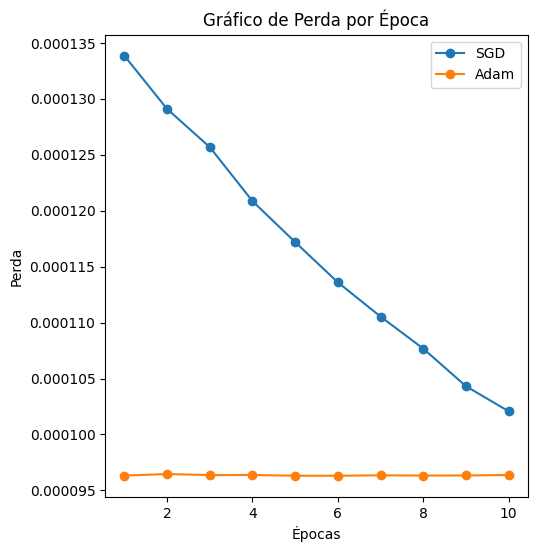

In [36]:
#gráfico perdas e épocas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), sgd_losses, marker='o', label='SGD')
plt.plot(range(1, 11), adam_losses, marker='o', label='Adam')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Gráfico de Perda por Época')
plt.legend()